# TCGA RNAseq invasive breast cancer data:

ToDO:

2) box plot with P-value


4) OV data

3) PCA of DEG


1) #To do: how to convert dataframe to series
s=pd.read_csv('TCGA_1072patients_p_value_20501Allgenes.csv',sep=',',index_col=0)
#s= pd.Series(index = AllGenes)

Data: 
0) TCGA RNAseq data is downloaded from Broad FireBrowse with annotated gene IDs and TCGA IDs: http://firebrowse.org/
1) 1212 patients' samples with at least 48 normal samples, tumor samples with clinical data are 1080 patients.
2) SRSF7 gene is called SFRS7 in the TCGA data and metabric probe data.

For four interested genes 'CCNE1','TPX2', 'TRA2B','SFRS7':
1) using overall survival data, only CCNE1's expression is significantly related to survival;
2) using 5-year-survival data, CCNE1 and TPX2 are significant.
3) No correlation seen between these four genes' expression vs immune infiltration

Done:
1) Get Firehose clinical data, and compare it with cBioPortal clinical data
2) Convert days to months, and see the survival
3) OV data
4) dbGAP login
5) overall survival for all patients

TCGA barcode: https://wiki.nci.nih.gov/display/TCGA/TCGA+barcode
	
Tumor types range from 01 - 09, normal types from 10 - 19 and control samples from 20 - 29. See Code Tables Report for a complete list of sample codes

In [1]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import statistics as st
import glob
import matplotlib.pyplot as plt

In [2]:
#Rank by Q-Value
s=pd.read_csv('TCGA_BRCA_1072patients_p_value_20501Allgenes.csv',sep=',',index_col=0)
from statsmodels.sandbox.stats.multicomp import multipletests
qvalues = multipletests(s.dropna().sort_values(), alpha= .05, method='fdr_bh', is_sorted=True, returnsorted=False)[1]
df_rank = s.dropna().sort_values().to_frame(name='P-value') 
df_rank['Q-value'] = qvalues
df_rank=df_rank.sort_values('Q-value')
df_rank.to_csv('TNBC_TCGA_1072patients_RankedByQvalue_SurvivalAnalyses.csv')

TypeError: sort_values() missing 1 required positional argument: 'by'

In [3]:
#132 TNBC from TCGA database
GeneExpressionFilename = '/Users/zhaoz/Dropbox/JAX/TNBC_CItyOfHope/GeneExpressionAnalyses/TCGA_TNBC/TNBC_TCGA_132_RNAseq.csv'
df1 = pd.read_csv(GeneExpressionFilename,sep=',',index_col=0).T
df1.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
TCGA-A1-A0SK-01A-12R-A084-07,86.6436,0.0,0.0,404.1790,24.8976,4190.3561,79.7353,0.6303,0.0000,1015.1276,...,69.0199,610.1481,1775.6067,158.5251,1380.7123,591.2386,1798.9285,1335.6445,49.4800,0.0000
TCGA-A1-A0SO-01A-22R-A084-07,293.0874,0.0,0.0,101.9611,22.7097,4093.8532,37.0384,1.0814,0.0000,573.6899,...,71.6436,561.2536,374.1691,108.4117,1791.9022,1341.2231,821.0632,897.8436,444.4610,0.0000
TCGA-A1-A0SP-01A-11R-A084-07,36.7749,0.0,0.0,64.2941,853.7030,5247.5812,775.6293,2.1890,3.2835,722.7289,...,26.9974,292.2291,1040.4962,241.5177,681.5031,3473.9146,721.9993,1414.0825,15.3229,0.3648
TCGA-A2-A04P-01A-31R-A034-07,108.7500,0.0,0.0,88.6515,1645.7469,9295.5861,150.4149,0.0000,0.0000,813.2780,...,14.5228,178.9419,887.9668,214.2116,722.5104,4314.8340,686.7220,686.7220,2635.8921,5.7054
TCGA-A2-A04Q-01A-21R-A034-07,114.2345,0.0,0.0,108.3918,2293.4825,12783.2086,439.2595,1.5426,0.0000,635.1716,...,37.0228,298.4960,885.4609,127.2657,728.4998,4357.1153,896.6448,568.0679,26.2245,0.0000


In [9]:
df1["PLIN2"] #PLIN2: ADIPOPHILIN

TCGA-A1-A0SK-01A-12R-A084-07    2550.5830
TCGA-A1-A0SO-01A-22R-A084-07    1240.1110
TCGA-A1-A0SP-01A-11R-A084-07    1152.8639
TCGA-A2-A04P-01A-31R-A034-07     643.6722
TCGA-A2-A04Q-01A-21R-A034-07    2037.7941
TCGA-A2-A04T-01A-21R-A034-07     796.6617
TCGA-A2-A04U-01A-11R-A115-07    1943.1095
TCGA-A2-A0CM-01A-31R-A034-07    2424.3683
TCGA-A2-A0D0-01A-11R-A00Z-07    1620.2636
TCGA-A2-A0D2-01A-21R-A034-07    1622.9902
TCGA-A2-A0ST-01A-12R-A084-07    1224.6819
TCGA-A2-A0SX-01A-12R-A084-07    2522.4791
TCGA-A2-A0T0-01A-22R-A084-07    4186.6805
TCGA-A2-A0T2-01A-11R-A084-07    6499.3313
TCGA-A2-A0YE-01A-11R-A109-07     663.1812
TCGA-A2-A0YM-01A-11R-A109-07    2863.4030
TCGA-A2-A1G6-01A-11R-A13Q-07     778.8526
TCGA-A2-A3XT-01A-11R-A22U-07    4740.7359
TCGA-A2-A3XX-01A-21R-A239-07    1000.4284
TCGA-A2-A3XY-01A-11R-A239-07    2120.6563
TCGA-A7-A0CE-01A-11R-A00Z-07    2572.0824
TCGA-A7-A0DA-01A-31R-A115-07    1276.1044
TCGA-A7-A26F-01A-21R-A169-07    1385.8080
TCGA-A7-A26G-01A-21R-A169-07    23

In [3]:
df1.shape

(132, 20501)

In [3]:
newlst0 = []
for i in (df1.index):
    newlst0.append(i[0:16])
TCGA_TNBC_patientsID = newlst0#[1:]
TCGA_TNBC_patientsID[0]
df1.index=TCGA_TNBC_patientsID
df1.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
TCGA-A1-A0SK-01A,86.6436,0.0,0.0,404.1790,24.8976,4190.3561,79.7353,0.6303,0.0000,1015.1276,...,69.0199,610.1481,1775.6067,158.5251,1380.7123,591.2386,1798.9285,1335.6445,49.4800,0.0000
TCGA-A1-A0SO-01A,293.0874,0.0,0.0,101.9611,22.7097,4093.8532,37.0384,1.0814,0.0000,573.6899,...,71.6436,561.2536,374.1691,108.4117,1791.9022,1341.2231,821.0632,897.8436,444.4610,0.0000
TCGA-A1-A0SP-01A,36.7749,0.0,0.0,64.2941,853.7030,5247.5812,775.6293,2.1890,3.2835,722.7289,...,26.9974,292.2291,1040.4962,241.5177,681.5031,3473.9146,721.9993,1414.0825,15.3229,0.3648
TCGA-A2-A04P-01A,108.7500,0.0,0.0,88.6515,1645.7469,9295.5861,150.4149,0.0000,0.0000,813.2780,...,14.5228,178.9419,887.9668,214.2116,722.5104,4314.8340,686.7220,686.7220,2635.8921,5.7054
TCGA-A2-A04Q-01A,114.2345,0.0,0.0,108.3918,2293.4825,12783.2086,439.2595,1.5426,0.0000,635.1716,...,37.0228,298.4960,885.4609,127.2657,728.4998,4357.1153,896.6448,568.0679,26.2245,0.0000


In [4]:
#cBioPortal survival data
FileName_CB = '/Users/zhaoz/Dropbox/SurvivalAnalyses_Jupyter/SurvivalData_cBioPortal_1093PRIMARY.csv'
df_CBP = pd.read_csv(FileName_CB, sep=',',index_col='Patient_ID',dtype={"Dead":bool,"OS_Months":float},na_filter=True)
df_CBP=df_CBP.sort_values(by='OS_Months')
df_CBP.head() #13 patients with 0 or negative OS_months, with one patient with negative and 12 patients with 0.

,Dead,OS_Months,DiseaseFreeStatus,DiseaseFreeMonths
Patient_ID,,,,
TCGA-PL-A8LV-01A,False,-0.23,DiseaseFree,-0.23
TCGA-A8-A09G-01A,False,0.00,DiseaseFree,0.00
TCGA-A8-A09Z-01A,False,0.00,DiseaseFree,0.00
TCGA-A8-A096-01A,False,0.00,DiseaseFree,0.00
TCGA-A8-A094-01A,False,0.00,DiseaseFree,0.00


In [6]:
df_CBP.shape

(1093, 4)

In [5]:
test = '/Users/zhaoz/Dropbox/SurvivalAnalyses_Jupyter/RNA-seq.tsv'
df_test = pd.read_csv(test,sep='\t',index_col=0)
df_test.head()

,HSPA2|3306,WT1|7490,RECK|8434
Patient ID,,,
TCGA-3C-AAAU,723.7835,0.6893,85.1307
TCGA-3C-AALI,3227.2974,27.1887,252.8548
TCGA-3C-AALJ,1458.7489,5.4397,144.1523
TCGA-3C-AALK,656.1854,9.5159,520.8937
TCGA-4H-AAAK,974.4681,5.9574,953.6170


In [6]:
test1 = '/Users/zhaoz/Dropbox/SurvivalAnalyses_Jupyter/brca_tcga_clinical_data.tsv'
df_test1 = pd.read_csv(test1,sep='\t',index_col=0)
df_test1.head()

,Sample ID,Adjuvant Postoperative Pharmaceutical Therapy Administered Indicator,American Joint Committee on Cancer Metastasis Stage Code,American Joint Committee on Cancer Publication Version Type,American Joint Committee on Cancer Tumor Stage Code,Birth from Initial Pathologic Diagnosis Date,Brachytherapy first reference point administered total dose,Cancer Studies,Cancer Type,Cancer Type Detailed,...,Time between excision and freezing,Tissue Prospective Collection Indicator,Tissue Retrospective Collection Indicator,Tissue Source Site,Tumor Disease Anatomic Site,Tumor Other Histologic Subtype,Vial number,Year Cancer Initial Diagnosis,days_to_patient_progression_free,days_to_tumor_progression
Patient ID,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AALI,TCGA-3C-AALI-01,YES,M0,6th,T2,-18538.0,NaN,brca_tcga,Breast Cancer,Breast Invasive Ductal Carcinoma,...,NaN,NO,YES,3C,Breast,NaN,A,2003.0,NaN,NaN
TCGA-3C-AALJ,TCGA-3C-AALJ-01,YES,M0,7th,T2,-22848.0,NaN,brca_tcga,Breast Cancer,Breast Invasive Ductal Carcinoma,...,NaN,NO,YES,3C,Breast,NaN,A,2011.0,NaN,NaN
TCGA-3C-AALK,TCGA-3C-AALK-01,YES,M0,7th,T1c,-19074.0,NaN,brca_tcga,Breast Cancer,Breast Invasive Ductal Carcinoma,...,NaN,NO,YES,3C,Breast,NaN,A,2011.0,NaN,NaN
TCGA-4H-AAAK,TCGA-4H-AAAK-01,YES,M0,7th,T2,-18371.0,NaN,brca_tcga,Breast Cancer,Breast Invasive Lobular Carcinoma,...,NaN,YES,NO,4H,Breast,NaN,A,2013.0,NaN,NaN
TCGA-5L-AAT0,TCGA-5L-AAT0-01,YES,M0,7th,T2,-15393.0,NaN,brca_tcga,Breast Cancer,Breast Invasive Lobular Carcinoma,...,NaN,NO,YES,5L,Breast,NaN,A,2010.0,NaN,NaN


In [9]:
df_test.shape

(1212, 3)

In [10]:
df_test1.shape

(1105, 139)

In [7]:
df_t=pd.concat([df_test,df_test1],axis=1,join="inner")
df_t

ValueError: Shape of passed values is (142, 1229), indices imply (142, 1100)

In [8]:
#TCGA FireBrowser gene expression for 1212 samples with 1093 primary, 112 normal, and 7 mets.
TCGA_breast = '/Users/zhaoz/Dropbox/JAX/TNBC_CItyOfHope/GeneExpressionAnalyses/TCGA_RNAseq/BRCA.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt'
#df = pd.read_csv(TCGA_breast,sep='	',index_col=0,low_memory=False).T
df_tcga = pd.read_csv(TCGA_breast,sep='	',index_col=0,skiprows=[1],low_memory=False).T
df_tcga.head()

Hybridization REF,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
TCGA-3C-AAAU-01A-11R-A41B-07,0.0000,16.3644,12.9316,52.1503,408.0760,0.0,1187.0050,0.0000,0.0000,0.0,...,129.5917,1007.7824,1658.4983,258.4941,1208.3738,3507.2482,1894.9342,1180.4565,1.7233,0.0
TCGA-3C-AALI-01A-11R-A41B-07,0.0000,9.2659,17.3790,69.7553,563.8934,0.0,516.0413,1.0875,0.5438,0.0,...,59.8151,448.6134,1343.1213,198.4774,603.5889,5504.6221,1318.6514,406.7428,926.5905,0.0
TCGA-3C-AALJ-01A-31R-A41B-07,0.9066,11.6228,9.2294,154.2974,1360.8341,0.0,592.0218,0.0000,0.0000,0.0,...,35.3581,533.9982,768.8123,331.8223,532.1850,5458.7489,942.8830,509.5195,35.3581,0.0
TCGA-3C-AALK-01A-11R-A41B-07,0.0000,12.0894,11.0799,143.8643,865.5358,0.0,552.7513,0.4137,0.0000,0.0,...,55.0269,437.7327,863.8808,175.4241,607.3645,5691.3529,781.1336,700.8688,66.6115,0.0
TCGA-4H-AAAK-01A-12R-A41B-07,0.0000,6.8468,14.4298,84.2128,766.3830,0.0,260.8511,0.4255,0.0000,0.0,...,48.9362,424.2553,1049.7872,14.0426,775.7447,4041.7021,831.9149,881.7021,187.2340,0.0


In [9]:
#convert data in all columns to float
df_tcga[df_tcga.columns].astype(float)

Hybridization REF,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
TCGA-3C-AAAU-01A-11R-A41B-07,0.0000,16.3644,12.9316,52.1503,408.0760,0.0,1187.0050,0.0000,0.0000,0.0,...,129.5917,1007.7824,1658.4983,258.4941,1208.3738,3507.2482,1894.9342,1180.4565,1.7233,0.0000
TCGA-3C-AALI-01A-11R-A41B-07,0.0000,9.2659,17.3790,69.7553,563.8934,0.0,516.0413,1.0875,0.5438,0.0,...,59.8151,448.6134,1343.1213,198.4774,603.5889,5504.6221,1318.6514,406.7428,926.5905,0.0000
TCGA-3C-AALJ-01A-31R-A41B-07,0.9066,11.6228,9.2294,154.2974,1360.8341,0.0,592.0218,0.0000,0.0000,0.0,...,35.3581,533.9982,768.8123,331.8223,532.1850,5458.7489,942.8830,509.5195,35.3581,0.0000
TCGA-3C-AALK-01A-11R-A41B-07,0.0000,12.0894,11.0799,143.8643,865.5358,0.0,552.7513,0.4137,0.0000,0.0,...,55.0269,437.7327,863.8808,175.4241,607.3645,5691.3529,781.1336,700.8688,66.6115,0.0000
TCGA-4H-AAAK-01A-12R-A41B-07,0.0000,6.8468,14.4298,84.2128,766.3830,0.0,260.8511,0.4255,0.0000,0.0,...,48.9362,424.2553,1049.7872,14.0426,775.7447,4041.7021,831.9149,881.7021,187.2340,0.0000
TCGA-5L-AAT0-01A-12R-A41B-07,0.0000,3.9889,13.6090,114.2572,807.7431,0.0,276.2868,0.0000,0.0000,0.0,...,68.6318,643.4961,1115.7061,15.8381,626.4848,4131.9842,922.1293,1061.7393,85.0565,0.0000
TCGA-5L-AAT1-01A-12R-A41B-07,0.0000,0.0000,10.5949,115.9984,1108.3945,0.0,208.6390,0.0000,0.0000,0.0,...,44.8248,568.0522,988.5901,53.7897,513.4474,4418.0929,1411.5729,568.8672,57.8647,0.0000
TCGA-5T-A9QA-01A-11R-A41B-07,0.0000,1.4644,8.9958,107.5628,1420.5021,0.0,76.3598,0.5230,0.0000,0.0,...,28.7657,286.0879,809.6234,2.0921,321.6527,3221.7573,1115.0628,440.8996,3.6611,0.0000
TCGA-A1-A0SB-01A-11R-A144-07,0.0000,15.3396,14.3935,116.3870,657.2812,0.0,279.7612,0.4505,0.0000,0.0,...,95.9568,519.4279,1415.9252,19.3716,1364.5681,6186.7327,1931.2986,1436.1978,552.3144,0.0000
TCGA-A1-A0SD-01A-11R-A115-07,0.0000,9.5178,11.3241,60.2630,977.9175,0.0,83.6986,0.3308,0.0000,0.0,...,96.2700,578.2814,1225.7051,33.0825,868.0837,3559.6725,1278.9678,1195.6000,86.0144,0.0000


In [10]:
df_tcga.index
#1212 total TCGA patients IDs. 112 patients out out 1212 are not tumor with the pattern: TCGA\-[A-Z]*[0-9]*[A-Z]*\-[A-Z]*[0-9]*[A-Z]*[0-9]*\-[1-9][0-9][A-Z]\,
# 7 patients IDs are metastatic tumors 
#Get patient ID in the TCGA with Normal status
newlst1 = []
sampleType=[]
for i in (df_tcga.index):
    #sample=i[13:15]
    newlst1.append(i[0:16])
        #sampleType.append(i[13:15])
df_tcga.index = newlst1
df_tcga.head()
#df_tcga.shape

Hybridization REF,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
TCGA-3C-AAAU-01A,0.0000,16.3644,12.9316,52.1503,408.0760,0.0,1187.0050,0.0000,0.0000,0.0,...,129.5917,1007.7824,1658.4983,258.4941,1208.3738,3507.2482,1894.9342,1180.4565,1.7233,0.0
TCGA-3C-AALI-01A,0.0000,9.2659,17.3790,69.7553,563.8934,0.0,516.0413,1.0875,0.5438,0.0,...,59.8151,448.6134,1343.1213,198.4774,603.5889,5504.6221,1318.6514,406.7428,926.5905,0.0
TCGA-3C-AALJ-01A,0.9066,11.6228,9.2294,154.2974,1360.8341,0.0,592.0218,0.0000,0.0000,0.0,...,35.3581,533.9982,768.8123,331.8223,532.1850,5458.7489,942.8830,509.5195,35.3581,0.0
TCGA-3C-AALK-01A,0.0000,12.0894,11.0799,143.8643,865.5358,0.0,552.7513,0.4137,0.0000,0.0,...,55.0269,437.7327,863.8808,175.4241,607.3645,5691.3529,781.1336,700.8688,66.6115,0.0
TCGA-4H-AAAK-01A,0.0000,6.8468,14.4298,84.2128,766.3830,0.0,260.8511,0.4255,0.0000,0.0,...,48.9362,424.2553,1049.7872,14.0426,775.7447,4041.7021,831.9149,881.7021,187.2340,0.0


In [11]:
#Get gene ID in the TCGA
newlst2 = []
for i in (df_tcga.columns):
    loc=i.find('|')
    newlst2.append(i[0:loc])
df_tcga.columns = newlst2
df_tcga.head()

,?,?,?,?,?,?,?,?,?,?,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
TCGA-3C-AAAU-01A,0.0000,16.3644,12.9316,52.1503,408.0760,0.0,1187.0050,0.0000,0.0000,0.0,...,129.5917,1007.7824,1658.4983,258.4941,1208.3738,3507.2482,1894.9342,1180.4565,1.7233,0.0
TCGA-3C-AALI-01A,0.0000,9.2659,17.3790,69.7553,563.8934,0.0,516.0413,1.0875,0.5438,0.0,...,59.8151,448.6134,1343.1213,198.4774,603.5889,5504.6221,1318.6514,406.7428,926.5905,0.0
TCGA-3C-AALJ-01A,0.9066,11.6228,9.2294,154.2974,1360.8341,0.0,592.0218,0.0000,0.0000,0.0,...,35.3581,533.9982,768.8123,331.8223,532.1850,5458.7489,942.8830,509.5195,35.3581,0.0
TCGA-3C-AALK-01A,0.0000,12.0894,11.0799,143.8643,865.5358,0.0,552.7513,0.4137,0.0000,0.0,...,55.0269,437.7327,863.8808,175.4241,607.3645,5691.3529,781.1336,700.8688,66.6115,0.0
TCGA-4H-AAAK-01A,0.0000,6.8468,14.4298,84.2128,766.3830,0.0,260.8511,0.4255,0.0000,0.0,...,48.9362,424.2553,1049.7872,14.0426,775.7447,4041.7021,831.9149,881.7021,187.2340,0.0


In [12]:
TCGA_patients=df_tcga.index
TCGA_patients

Index(['TCGA-3C-AAAU-01A', 'TCGA-3C-AALI-01A', 'TCGA-3C-AALJ-01A',
       'TCGA-3C-AALK-01A', 'TCGA-4H-AAAK-01A', 'TCGA-5L-AAT0-01A',
       'TCGA-5L-AAT1-01A', 'TCGA-5T-A9QA-01A', 'TCGA-A1-A0SB-01A',
       'TCGA-A1-A0SD-01A',
       ...
       'TCGA-UL-AAZ6-01A', 'TCGA-UU-A93S-01A', 'TCGA-V7-A7HQ-01A',
       'TCGA-W8-A86G-01A', 'TCGA-WT-AB41-01A', 'TCGA-WT-AB44-01A',
       'TCGA-XX-A899-01A', 'TCGA-XX-A89A-01A', 'TCGA-Z7-A8R5-01A',
       'TCGA-Z7-A8R6-01A'],
      dtype='object', length=1212)

In [27]:
df_tcga.shape

(1212, 20531)

In [13]:
#Interested gene list: 
InterestedGenes=['FLT3','FANCL','SYK','TPX2','CEP76','ELF3','JAK2','CCNE1','GSK3B']

In [22]:
df_CBP.head()

,Dead,OS_Months,DiseaseFreeStatus,DiseaseFreeMonths
Patient_ID,,,,
TCGA-PL-A8LV-01A,False,-0.23,DiseaseFree,-0.23
TCGA-A8-A09G-01A,False,0.00,DiseaseFree,0.00
TCGA-A8-A09Z-01A,False,0.00,DiseaseFree,0.00
TCGA-A8-A096-01A,False,0.00,DiseaseFree,0.00
TCGA-A8-A094-01A,False,0.00,DiseaseFree,0.00


In [15]:
df_CBP.shape

(1093, 4)

In [16]:
df_tcga.shape

(1212, 20531)

In [14]:
df_survival = pd.concat([df_CBP,df_tcga[InterestedGenes]], axis = 1, join = 'inner')
df_survival.head()

,Dead,OS_Months,DiseaseFreeStatus,DiseaseFreeMonths,FLT3,FANCL,SYK,TPX2,CEP76,ELF3,JAK2,CCNE1,GSK3B
TCGA-PL-A8LV-01A,False,-0.23,DiseaseFree,-0.23,32.0073,831.9936,2022.8624,3462.2771,72.7023,7696.8450,315.9579,683.1276,1616.8267
TCGA-A8-A09G-01A,False,0.00,DiseaseFree,0.00,33.3639,224.1598,514.5393,1504.1322,163.7588,4576.9819,648.9134,114.1720,3056.6269
TCGA-A8-A09Z-01A,False,0.00,DiseaseFree,0.00,0.7138,154.9358,294.0757,734.1185,68.1656,8071.7345,594.2184,8.5653,1146.3241
TCGA-A8-A096-01A,False,0.00,DiseaseFree,0.00,144.4096,226.4222,924.5559,1202.5078,162.3824,3648.2759,618.3908,33.2288,1638.2445
TCGA-A8-A094-01A,False,0.00,DiseaseFree,0.00,14.9906,188.5946,941.9113,2007.4953,199.2505,1346.0337,572.7670,168.0200,1347.2829


In [15]:
PrimaryPatients=df_survival.index
PrimaryPatients
Normal_Met_Patients=list(set(TCGA_patients)-set(PrimaryPatients))

In [17]:
df_survival.shape

(1075, 13)

In [16]:
GeneLists=InterestedGenes

In [17]:
df_survival=df_survival[df_survival.OS_Months.notnull()]
df_survival.shape

(1072, 13)

In [18]:
df_survival=df_survival[df_survival.Dead.notnull()]
df_survival.shape

(1072, 13)

In [28]:
df_survival.to_csv('TCGA_1072_NineGenes_survival.csv')

In [19]:
df_survival

,Dead,OS_Months,DiseaseFreeStatus,DiseaseFreeMonths,FLT3,FANCL,SYK,TPX2,CEP76,ELF3,JAK2,CCNE1,GSK3B
TCGA-PL-A8LV-01A,False,-0.23,DiseaseFree,-0.23,32.0073,831.9936,2022.8624,3462.2771,72.7023,7696.8450,315.9579,683.1276,1616.8267
TCGA-A8-A09G-01A,False,0.00,DiseaseFree,0.00,33.3639,224.1598,514.5393,1504.1322,163.7588,4576.9819,648.9134,114.1720,3056.6269
TCGA-A8-A09Z-01A,False,0.00,DiseaseFree,0.00,0.7138,154.9358,294.0757,734.1185,68.1656,8071.7345,594.2184,8.5653,1146.3241
TCGA-A8-A096-01A,False,0.00,DiseaseFree,0.00,144.4096,226.4222,924.5559,1202.5078,162.3824,3648.2759,618.3908,33.2288,1638.2445
TCGA-A8-A094-01A,False,0.00,DiseaseFree,0.00,14.9906,188.5946,941.9113,2007.4953,199.2505,1346.0337,572.7670,168.0200,1347.2829
TCGA-A8-A08H-01A,False,0.00,DiseaseFree,0.00,124.7355,249.7784,2408.7315,1446.0408,135.8726,906.5598,677.5810,83.3055,1368.9720
TCGA-C8-A12K-01A,False,0.00,DiseaseFree,0.00,525.6015,698.3467,1883.7138,6118.1370,347.0080,3573.1030,1070.3270,388.6490,1474.3985
TCGA-A8-A06N-01A,False,0.00,DiseaseFree,0.00,9.4080,295.9615,298.0725,756.3102,167.9670,5133.0886,217.0721,21.7990,2092.7031
TCGA-A8-A081-01A,False,0.00,DiseaseFree,0.00,25.4876,395.2146,442.1326,2684.5254,217.9454,1016.3849,260.5982,76.4629,2904.2913
TCGA-A8-A090-01A,False,0.00,DiseaseFree,0.00,675.5154,429.1029,996.3287,1650.7578,109.5736,740.2805,433.0227,123.1291,1865.7630


In [20]:
TCGA_normal = '/Users/zhaoz/Dropbox/JAX/TNBC_CItyOfHope/GeneExpressionAnalyses/TCGA_112NormalPatients.txt'
NormalPatients = pd.read_csv(TCGA_normal,sep='\n',low_memory=False)
#NormalPatients

In [22]:
df_9gene=df_tcga[InterestedGenes].astype(float)
df_9gene.shape

(1212, 9)

In [23]:
df_normal=df_9gene.T[NormalPatients['112NormalPatients']].T
df_normal.head()


,FLT3,FANCL,SYK,TPX2,CEP76,ELF3,JAK2,CCNE1,GSK3B
TCGA-E9-A1RD-11A,19.5835,241.0880,591.8558,104.1343,124.3394,942.4930,921.6661,28.5981,1356.2325
TCGA-BH-A0BJ-11A,75.9804,385.7230,516.7484,180.5556,192.8105,6753.2680,450.1634,26.1438,1662.5817
TCGA-BH-A18S-11A,22.2960,304.5446,999.0512,106.2619,130.4554,7639.9431,556.4516,15.1803,1159.3928
TCGA-AC-A2FF-11A,214.0580,313.1143,997.9125,466.6799,135.8122,1912.2698,527.8792,54.4926,1510.4221
TCGA-BH-A1F0-11B,10.0979,250.3641,502.4480,47.7356,143.5129,2525.0918,816.0955,23.5618,1323.7454


In [24]:
df_cBioportalSurvival.head()

NameError: name 'df_cBioportalSurvival' is not defined

In [25]:
df_cBioportalSurvival.shape
new=[]
for i in (df_normal.index):
    new.append(i[0:13]+'01')
df_normal.index=new
df_normal.head()

NameError: name 'df_cBioportalSurvival' is not defined

In [34]:
df_survival_normal = pd.concat([df_cBioportalSurvival,df_normal], axis = 1, join = 'inner')
df_survival_normal.head()

NameError: name 'df_cBioportalSurvival' is not defined

In [91]:
df_survival_normal.columns=df_survival.columns

In [35]:
df_survival_normal.head()

NameError: name 'df_survival_normal' is not defined

In [93]:
df_survival_normal.to_csv('Normal_9genes.csv')

In [26]:
df_survival.head()

,Dead,OS_Months,DiseaseFreeStatus,DiseaseFreeMonths,FLT3,FANCL,SYK,TPX2,CEP76,ELF3,JAK2,CCNE1,GSK3B
TCGA-PL-A8LV-01A,False,-0.23,DiseaseFree,-0.23,32.0073,831.9936,2022.8624,3462.2771,72.7023,7696.8450,315.9579,683.1276,1616.8267
TCGA-A8-A09G-01A,False,0.00,DiseaseFree,0.00,33.3639,224.1598,514.5393,1504.1322,163.7588,4576.9819,648.9134,114.1720,3056.6269
TCGA-A8-A09Z-01A,False,0.00,DiseaseFree,0.00,0.7138,154.9358,294.0757,734.1185,68.1656,8071.7345,594.2184,8.5653,1146.3241
TCGA-A8-A096-01A,False,0.00,DiseaseFree,0.00,144.4096,226.4222,924.5559,1202.5078,162.3824,3648.2759,618.3908,33.2288,1638.2445
TCGA-A8-A094-01A,False,0.00,DiseaseFree,0.00,14.9906,188.5946,941.9113,2007.4953,199.2505,1346.0337,572.7670,168.0200,1347.2829


In [27]:
NonTNBC_Patients=set(df_survival.index)-set(TCGA_TNBC_patientsID)
NonTNBC_Patients=list(NonTNBC_Patients)
NonTNBC_Patients

['TCGA-AR-A0TZ-01A',
 'TCGA-BH-A0H3-01A',
 'TCGA-BH-A18L-01A',
 'TCGA-BH-A0EB-01A',
 'TCGA-E2-A106-01A',
 'TCGA-A8-A07E-01A',
 'TCGA-A2-A0CX-01A',
 'TCGA-JL-A3YW-01A',
 'TCGA-C8-A8HQ-01A',
 'TCGA-B6-A3ZX-01A',
 'TCGA-E2-A15S-01A',
 'TCGA-BH-AB28-01A',
 'TCGA-C8-A3M8-01A',
 'TCGA-A8-A08X-01A',
 'TCGA-A7-A4SB-01A',
 'TCGA-EW-A1P6-01A',
 'TCGA-D8-A1XU-01A',
 'TCGA-A2-A25C-01A',
 'TCGA-A2-A0T1-01A',
 'TCGA-LD-A7W5-01A',
 'TCGA-B6-A0WW-01A',
 'TCGA-BH-A1FJ-01A',
 'TCGA-OL-A5DA-01A',
 'TCGA-A8-A09Q-01A',
 'TCGA-BH-A1FG-01A',
 'TCGA-A8-A07R-01A',
 'TCGA-AO-A03V-01A',
 'TCGA-AC-A3HN-01A',
 'TCGA-E2-A1BC-01A',
 'TCGA-A8-A082-01A',
 'TCGA-AR-A2LH-01A',
 'TCGA-D8-A3Z6-01A',
 'TCGA-AN-A049-01A',
 'TCGA-D8-A1XM-01A',
 'TCGA-GM-A2DM-01A',
 'TCGA-BH-A0H0-01A',
 'TCGA-BH-A0HU-01A',
 'TCGA-AR-A0TW-01A',
 'TCGA-OL-A5S0-01A',
 'TCGA-E9-A1R4-01A',
 'TCGA-BH-A0W7-01A',
 'TCGA-GM-A3XL-01A',
 'TCGA-D8-A27K-01A',
 'TCGA-EW-A6SD-01A',
 'TCGA-E2-A1B1-01A',
 'TCGA-AC-A23H-01A',
 'TCGA-AC-A2BM-01A',
 'TCGA-A1-A0S

In [28]:
df_tcga_NonTNBC=df_survival.T[NonTNBC_Patients].T
df_tcga_NonTNBC.head()

,Dead,OS_Months,DiseaseFreeStatus,DiseaseFreeMonths,FLT3,FANCL,SYK,TPX2,CEP76,ELF3,JAK2,CCNE1,GSK3B
TCGA-AR-A0TZ-01A,True,107.16,Recurred/Progressed,43.13,380.952,273.786,1667.15,2317.06,264.657,9556.11,439.34,178.033,1359.89
TCGA-BH-A0H3-01A,False,63.34,DiseaseFree,63.34,49.6934,288.864,767.344,294.934,178.767,5357.53,514.36,15.1662,2066.47
TCGA-BH-A18L-01A,True,26.64,NaN,NaN,15.0289,201.364,486.127,3670.81,131.214,5896.53,123.121,48.5549,1995.38
TCGA-BH-A0EB-01A,False,24.47,DiseaseFree,24.47,12.8416,200.589,763.582,583.8,160.356,4042.81,453.408,31.9394,2087.26
TCGA-E2-A106-01A,False,83.48,DiseaseFree,83.48,399.855,308.769,355.306,355.306,149.583,11360.7,335.024,42.7381,2100.69


In [29]:
df_tcga_NonTNBC.shape

(942, 13)

In [30]:
df_survival.head()

,Dead,OS_Months,DiseaseFreeStatus,DiseaseFreeMonths,FLT3,FANCL,SYK,TPX2,CEP76,ELF3,JAK2,CCNE1,GSK3B
TCGA-PL-A8LV-01A,False,-0.23,DiseaseFree,-0.23,32.0073,831.9936,2022.8624,3462.2771,72.7023,7696.8450,315.9579,683.1276,1616.8267
TCGA-A8-A09G-01A,False,0.00,DiseaseFree,0.00,33.3639,224.1598,514.5393,1504.1322,163.7588,4576.9819,648.9134,114.1720,3056.6269
TCGA-A8-A09Z-01A,False,0.00,DiseaseFree,0.00,0.7138,154.9358,294.0757,734.1185,68.1656,8071.7345,594.2184,8.5653,1146.3241
TCGA-A8-A096-01A,False,0.00,DiseaseFree,0.00,144.4096,226.4222,924.5559,1202.5078,162.3824,3648.2759,618.3908,33.2288,1638.2445
TCGA-A8-A094-01A,False,0.00,DiseaseFree,0.00,14.9906,188.5946,941.9113,2007.4953,199.2505,1346.0337,572.7670,168.0200,1347.2829


In [31]:
dfc=df1[df1.index.isin(df_survival.index)]
dfc.shape
dfc.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
TCGA-A1-A0SK-01A,86.6436,0.0,0.0,404.1790,24.8976,4190.3561,79.7353,0.6303,0.0000,1015.1276,...,69.0199,610.1481,1775.6067,158.5251,1380.7123,591.2386,1798.9285,1335.6445,49.4800,0.0000
TCGA-A1-A0SO-01A,293.0874,0.0,0.0,101.9611,22.7097,4093.8532,37.0384,1.0814,0.0000,573.6899,...,71.6436,561.2536,374.1691,108.4117,1791.9022,1341.2231,821.0632,897.8436,444.4610,0.0000
TCGA-A1-A0SP-01A,36.7749,0.0,0.0,64.2941,853.7030,5247.5812,775.6293,2.1890,3.2835,722.7289,...,26.9974,292.2291,1040.4962,241.5177,681.5031,3473.9146,721.9993,1414.0825,15.3229,0.3648
TCGA-A2-A04P-01A,108.7500,0.0,0.0,88.6515,1645.7469,9295.5861,150.4149,0.0000,0.0000,813.2780,...,14.5228,178.9419,887.9668,214.2116,722.5104,4314.8340,686.7220,686.7220,2635.8921,5.7054
TCGA-A2-A04Q-01A,114.2345,0.0,0.0,108.3918,2293.4825,12783.2086,439.2595,1.5426,0.0000,635.1716,...,37.0228,298.4960,885.4609,127.2657,728.4998,4357.1153,896.6448,568.0679,26.2245,0.0000


In [32]:
df00=df_survival.T
TNBC=df00[dfc.index].T
TNBC.head()

,Dead,OS_Months,DiseaseFreeStatus,DiseaseFreeMonths,FLT3,FANCL,SYK,TPX2,CEP76,ELF3,JAK2,CCNE1,GSK3B
TCGA-A1-A0SK-01A,True,31.77,NaN,NaN,218.72,980.186,971.636,4394.58,539.553,4926.25,238.26,551.844,2483.45
TCGA-A1-A0SO-01A,False,27.99,DiseaseFree,27.99,143.828,814.207,802.679,11466,275.22,1232,206.28,288.737,1602.38
TCGA-A1-A0SP-01A,False,19.19,DiseaseFree,19.19,131.339,713.564,1234.22,3651.59,269.61,5375.05,188.982,472.455,1643.56
TCGA-A2-A04P-01A,True,18,Recurred/Progressed,10.28,17.1162,1501.94,1492.22,2990.66,99.5851,12814.3,408.195,392.116,1193.98
TCGA-A2-A04Q-01A,False,78.35,DiseaseFree,78.35,75.5881,314.639,1295.03,3143.08,116.467,3225.99,1217.51,351.33,1182.41


In [42]:
df_tcga_NonTNBC.to_csv('TCGA_nonTNBC_9genesExp.txt')
TNBC.to_csv('TCGA_TNBC_9genesExp.csv')

In [29]:
df_tcga_NonTNBC.shape

(942, 13)

In [33]:
df_tcga_NonTNBC

,Dead,OS_Months,DiseaseFreeStatus,DiseaseFreeMonths,FLT3,FANCL,SYK,TPX2,CEP76,ELF3,JAK2,CCNE1,GSK3B
TCGA-AR-A0TZ-01A,True,107.16,Recurred/Progressed,43.13,380.952,273.786,1667.15,2317.06,264.657,9556.11,439.34,178.033,1359.89
TCGA-BH-A0H3-01A,False,63.34,DiseaseFree,63.34,49.6934,288.864,767.344,294.934,178.767,5357.53,514.36,15.1662,2066.47
TCGA-BH-A18L-01A,True,26.64,NaN,NaN,15.0289,201.364,486.127,3670.81,131.214,5896.53,123.121,48.5549,1995.38
TCGA-BH-A0EB-01A,False,24.47,DiseaseFree,24.47,12.8416,200.589,763.582,583.8,160.356,4042.81,453.408,31.9394,2087.26
TCGA-E2-A106-01A,False,83.48,DiseaseFree,83.48,399.855,308.769,355.306,355.306,149.583,11360.7,335.024,42.7381,2100.69
TCGA-A8-A07E-01A,False,19.97,DiseaseFree,19.97,25.5014,216.785,865.616,1763.61,248.711,3535.53,486.533,90.2579,2334.1
TCGA-A2-A0CX-01A,False,56.77,DiseaseFree,56.77,4.8431,149.474,377.358,2162.85,171.93,4322.87,322.066,208.254,2043.39
TCGA-JL-A3YW-01A,False,11.83,DiseaseFree,11.83,85.3746,309.733,760.807,914.265,124.64,7374.28,331.412,311.599,1182.64
TCGA-C8-A8HQ-01A,False,12.48,DiseaseFree,12.48,12.069,351.455,959.31,2333.1,167.586,3672.76,408.276,110,1842.07
TCGA-B6-A3ZX-01A,True,37.84,Recurred/Progressed,32.65,115.153,393.817,1711.46,2234.76,115.483,1821,557.948,174.214,935.412


/Users/zhaoz/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


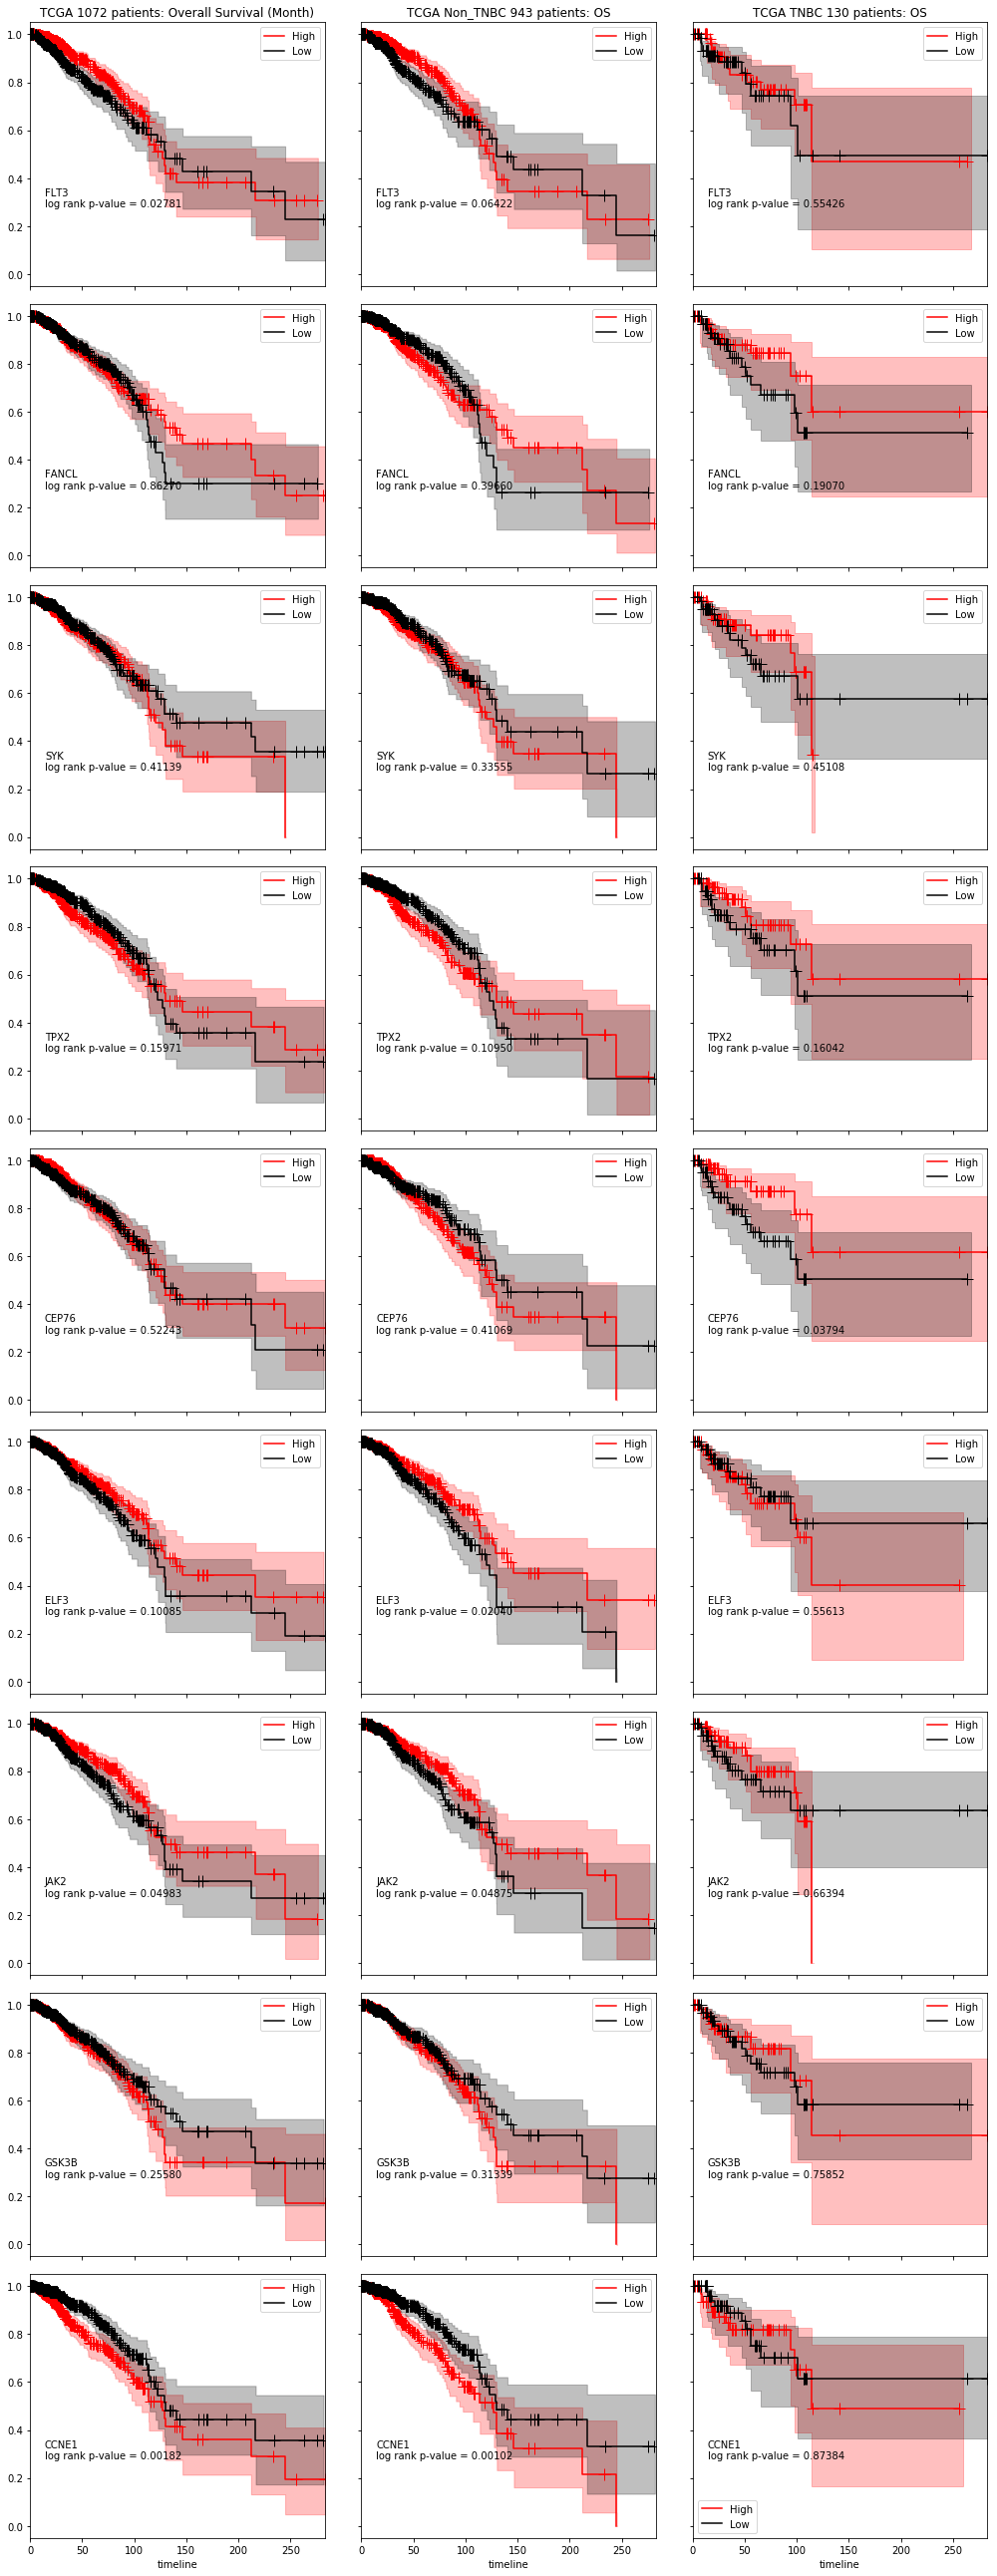

In [47]:
import matplotlib.pyplot as pl
GeneLists=['FLT3','FANCL','SYK','TPX2','CEP76','ELF3','JAK2','GSK3B','CCNE1']
#GeneLists=['CCNE1','TPX2']
n_column=3
fig,ax = pl.subplots(len(GeneLists),n_column,figsize=(14,4*len(GeneLists)),sharex=True,sharey=True)

ax[0,0].set_title("TCGA 1072 patients: Overall Survival (Month)")
ax[0,1].set_title("TCGA Non_TNBC 943 patients: OS")
ax[0,2].set_title("TCGA TNBC 130 patients: OS")

if len(GeneLists) == 1:
    ax = np.reshape(ax, (-1, len(ax)))

for i in range(len(GeneLists)):
    
    MergeSurvivalCurve(GeneLists[i],ax[i,0],GeneLists[i],df_survival,df_survival)
    MergeSurvivalCurve(GeneLists[i],ax[i,1],GeneLists[i],df_tcga_NonTNBC,df_tcga_NonTNBC)
    MergeSurvivalCurve(GeneLists[i],ax[i,2],GeneLists[i],TNBC,TNBC)
    #MergeFiveYearSurvivalCurve(GeneLists[i],ax[i,1],GeneLists[i],df_survival,df_survival)
    
pl.tight_layout()

# TCGA TNBC vs nonTNBC overall survival comparison

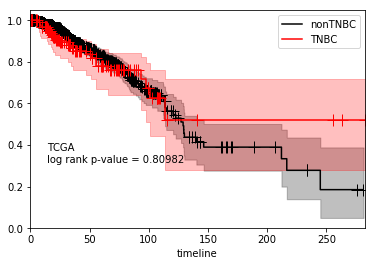

In [37]:
import matplotlib.pyplot as pl
ax = pl.subplot(111)
T1 = df_tcga_NonTNBC["OS_Months"]
C1 = df_tcga_NonTNBC["Dead"].astype(bool)
T2 = TNBC["OS_Months"]
C2 = TNBC["Dead"].astype(bool)
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
from lifelines.statistics import logrank_test
results = logrank_test(T1, T2, C1, C2, alpha=.95 )
kmf.fit(T1, event_observed=C1,label='nonTNBC')
kmf.plot(ax=ax,show_censors=True,color='black')
kmf.fit(T2, event_observed=C2,label='TNBC')
kmf.plot(ax=ax,show_censors=True,color='red')
results
pl.text(0.05,0.3,'%s\nlog rank p-value = %.5f'%('TCGA',results.p_value), transform = ax.transAxes)

# TCGA TNBC vs nonTNBC five year survival comparison

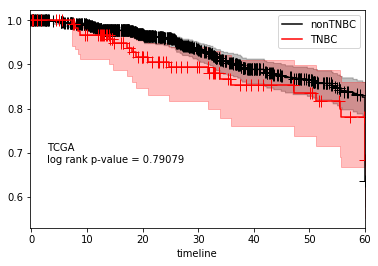

In [45]:
import matplotlib.pyplot as pl
ax = pl.subplot(111)
T1 = df_tcga_NonTNBC["OS_Months"]
C1 = df_tcga_NonTNBC["Dead"].astype(bool)
T2 = TNBC["OS_Months"]
C2 = TNBC["Dead"].astype(bool)

for i in (df_tcga_NonTNBC.index):
        if T1[i]>60:
            T1[i]=60
            C1[i]=0
for i in (TNBC.index):
        if T2[i]>60:
            T2[i]=60
            C2[i]=0
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
from lifelines.statistics import logrank_test
results = logrank_test(T1, T2, C1, C2, alpha=.95 )
kmf.fit(T1, event_observed=C1,label='nonTNBC')
kmf.plot(ax=ax,show_censors=True,color='black')
kmf.fit(T2, event_observed=C2,label='TNBC')
kmf.plot(ax=ax,show_censors=True,color='red')
results
pl.text(0.05,0.3,'%s\nlog rank p-value = %.5f'%('TCGA',results.p_value), transform = ax.transAxes)

# CCNE1 high expression between TNBC vs nonTNBC

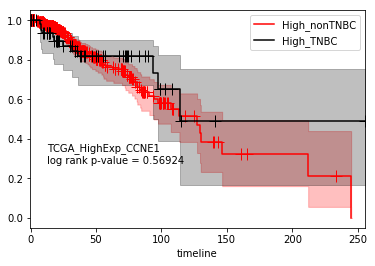

In [38]:
dem1 = df_tcga_NonTNBC['CCNE1'] > st.median(df_tcga_NonTNBC['CCNE1'])
dem2 = TNBC['CCNE1'] > st.median(TNBC['CCNE1'])
ax = pl.subplot(111)
T1 = df_tcga_NonTNBC["OS_Months"]
C1 = df_tcga_NonTNBC["Dead"].astype(bool)
T2 = TNBC["OS_Months"]
C2 = TNBC["Dead"].astype(bool)
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
from lifelines.statistics import logrank_test
results = logrank_test(T1[dem1], T2[dem2], C1[dem1], C2[dem2], alpha=.95 )
kmf.fit(T1[dem1], event_observed=C1[dem1] ,label='High_nonTNBC')
kmf.plot(ax=ax,show_censors=True,color='red')
kmf.fit(T2[dem2], event_observed=C2[dem2] ,label='High_TNBC')
kmf.plot(ax=ax,show_censors=True,color='black')
results
pl.text(0.05,0.3,'%s\nlog rank p-value = %.5f'%('TCGA_HighExp_CCNE1',results.p_value), transform = ax.transAxes)

# CCNE1 low expression between TNBC vs nonTNBC

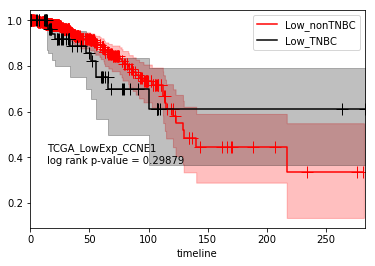

In [60]:
dem1 = df_tcga_NonTNBC['CCNE1'] > st.median(df_tcga_NonTNBC['CCNE1'])
dem2 = TNBC['CCNE1'] > st.median(TNBC['CCNE1'])
ax = pl.subplot(111)
T1 = df_tcga_NonTNBC["OS_Months"]
C1 = df_tcga_NonTNBC["Dead"].astype(bool)
T2 = TNBC["OS_Months"]
C2 = TNBC["Dead"].astype(bool)
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
from lifelines.statistics import logrank_test
results = logrank_test(T1[~dem1], T2[~dem2], C1[~dem1], C2[~dem2], alpha=.95 )
kmf.fit(T1[~dem1], event_observed=C1[~dem1] ,label='Low_nonTNBC')
kmf.plot(ax=ax,show_censors=True,color='red')
kmf.fit(T2[~dem2], event_observed=C2[~dem2] ,label='Low_TNBC')
kmf.plot(ax=ax,show_censors=True,color='black')
results
pl.text(0.05,0.3,'%s\nlog rank p-value = %.5f'%('TCGA_LowExp_CCNE1',results.p_value), transform = ax.transAxes)

In [46]:
def MergeSurvivalCurve(GeneID, axis,Genename, df_survival, expression):    
    T = df_survival["OS_Months"]
    C = df_survival["Dead"].astype(bool)

    from lifelines import KaplanMeierFitter
    kmf = KaplanMeierFitter()

    import matplotlib.pylab as pl
    dem = expression[Genename] > st.median(expression[Genename])
    #print (dem)

    #ax = pl.subplot(111)
    ConvertedTS=0


    kmf.fit(T[dem], event_observed=C[dem] ,label='High')
    kmf.plot(ax=axis,show_censors=True,color='red')
    #kmf.survival_function_.plot(ax=axis,color='red')

    kmf.fit(T[~dem], event_observed=C[~dem] ,label='Low')
    kmf.plot(ax=axis,show_censors=True,color='black')
    #kmf.survival_function_.plot(ax=axis,color='black')

    from lifelines.statistics import logrank_test


    results = logrank_test(T[dem], T[~dem], C[dem], C[~dem], alpha=.95 )
    #pl.title('%s\np-value = %.2e'%(Genename,results.p_value))
    pl.text(0.05,0.3,'%s\nlog rank p-value = %.5f'%(GeneID,results.p_value), transform = axis.transAxes)

    pl.legend(loc='lower left')
    #return ConvertedTS


In [33]:
AllGenes=df_tcga.columns
#AllGenes = df_tcga.replace({'?': ""})
AllGenes=AllGenes[29:]
AllGenes

Index(['A1BG', 'A1CF', 'A2BP1', 'A2LD1', 'A2ML1', 'A2M', 'A4GALT', 'A4GNT',
       'AAA1', 'AAAS',
       ...
       'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3',
       'psiTPTE22', 'tAKR'],
      dtype='object', length=20502)

In [34]:
df_survival_allGenes = pd.concat([df_CBP,df_tcga], axis = 1, join = 'inner')
df_survival_allGenes.shape # (1075, 20535)

df_survival_allGenes=df_survival_allGenes[df_survival_allGenes.OS_Months.notnull()]
df_survival_allGenes.shape #(1072, 20535)

df_survival_allGenes.head()

,Dead,OS_Months,DiseaseFreeStatus,DiseaseFreeMonths,?,?,?,?,?,?,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
TCGA-PL-A8LV-01A,False,-0.23,DiseaseFree,-0.23,0.4618,20.0732,33.8820,72.5789,964.3347,0.0,...,27.4348,302.6978,1492.4554,220.8505,691.8153,4192.5011,941.9296,612.7115,372.6566,0.0
TCGA-A8-A09G-01A,False,0.00,DiseaseFree,0.00,0.0000,14.7567,10.6489,73.4956,1238.4451,0.0,...,46.5259,429.1399,1211.2029,184.8791,1050.1990,2614.6312,1315.8861,647.3829,26.3238,0.0
TCGA-A8-A09Z-01A,False,0.00,DiseaseFree,0.00,0.0000,12.7052,8.7081,129.0221,743.3976,0.0,...,87.4375,585.2962,1230.9065,0.3569,620.9850,5329.4076,2589.9358,1233.0478,16.7737,0.0
TCGA-A8-A096-01A,False,0.00,DiseaseFree,0.00,0.0000,2.3950,4.9195,94.6437,711.5987,0.0,...,78.7879,469.3835,1102.6123,3.1348,817.1369,3288.4013,1576.1755,1185.3710,25.7053,0.0
TCGA-A8-A094-01A,False,0.00,DiseaseFree,0.00,0.0000,1.0244,11.4678,81.1993,1270.4560,0.0,...,49.3442,540.9119,616.4897,131.7926,689.5690,2394.7533,1180.5122,823.8601,569.0194,0.0


In [46]:
df_survival_allGenes.columns

Index(['Dead', 'OS_Months', 'DiseaseFreeStatus', 'DiseaseFreeMonths', '?', '?',
       '?', '?', '?', '?',
       ...
       'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3',
       'psiTPTE22', 'tAKR'],
      dtype='object', length=20535)

In [45]:
uniq=df_survival_allGenes.columns.unique()
uniq #SLC35E2 are repeating in the column

Index(['Dead', 'OS_Months', 'DiseaseFreeStatus', 'DiseaseFreeMonths', '?',
       'A1BG', 'A1CF', 'A2BP1', 'A2LD1', 'A2ML1',
       ...
       'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3',
       'psiTPTE22', 'tAKR'],
      dtype='object', length=20506)

In [75]:
df_survival_allGenes.columns[16304:16306]

Index(['SLC35E2_1', 'SLC35E2_1'], dtype='object')

In [85]:
df_survival_allGenes.columns[16304:16306]
#df_survival_allGenes.rename(columns={'SLC35E2_2': 'SLC35E2_1', 'SLC35E2': 'SLC35E2_2'}, inplace=True)

Index(['SLC35E2_1', 'SLC35E2_1'], dtype='object')

In [86]:
del df_survival_allGenes['SLC35E2_1']

In [87]:
df_survival_allGenes.columns[16304:16306]

Index(['SLC35E3', 'SLC35E4'], dtype='object')

In [88]:
df_survival_allGenes.shape

(1072, 20533)

In [106]:
s.to_csv('TCGA_1072patients_p_value.csv')

In [40]:
s['SLC35E2']
#df_survival_allGenes["SLC35E2"]

SLC35E2   NaN
SLC35E2   NaN
dtype: float64

In [78]:
AllGenes

Index(['A1BG', 'A1CF', 'A2BP1', 'A2LD1', 'A2ML1', 'A2M', 'A4GALT', 'A4GNT',
       'AAA1', 'AAAS',
       ...
       'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3',
       'psiTPTE22', 'tAKR'],
      dtype='object', length=20501)

In [98]:
AllGenes[16270:16273]


['SLC35E1', 'SLC35E3', 'SLC35E4']

In [96]:
AllGenes=list(AllGenes)

In [97]:
#del AllGenes[16271] #remove gene SLC35E2 from the list

In [77]:
AllGenes=AllGenes.unique() #20501 genes after unique, one gene 'SLC35E2' is redundant

In [104]:
#Calculate P-value for all genes
s = pd.Series(index = AllGenes)
for gene in AllGenes[16271:]:
    s[gene] = getPValue(gene)

#Rank by Q-Value
from statsmodels.sandbox.stats.multicomp import multipletests
qvalues = multipletests(s.dropna().sort_values(), alpha= .05, method='fdr_bh', is_sorted=True, returnsorted=False)[1]
df_rank = s.dropna().sort_values().to_frame(name='P-value') 
df_rank['Q-value'] = qvalues
df_rank=df_rank.sort_values('Q-value')
df_rank.to_csv('TNBC_TCGA_1072patients_RankedByQvalue_SurvivalAnalyses.csv')

In [36]:
#Get  P-values for survival analyses
def getPValue(Genename):
    
    ge=df_survival_allGenes[Genename].astype(float)
    try: 
        dem = ge > st.median(ge)
    except TypeError:
        print (Genename)
        raise
    T = df_survival_allGenes["OS_Months"]
    C = df_survival_allGenes["Dead"].astype(bool)

    from lifelines.statistics import logrank_test
    
    if np.all(dem) | np.all(~dem):
        return np.nan
    else: 
        results = logrank_test(T[dem], T[~dem], C[dem], C[~dem], alpha=.95 )
        return (results.p_value)

/Users/zhaoz/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


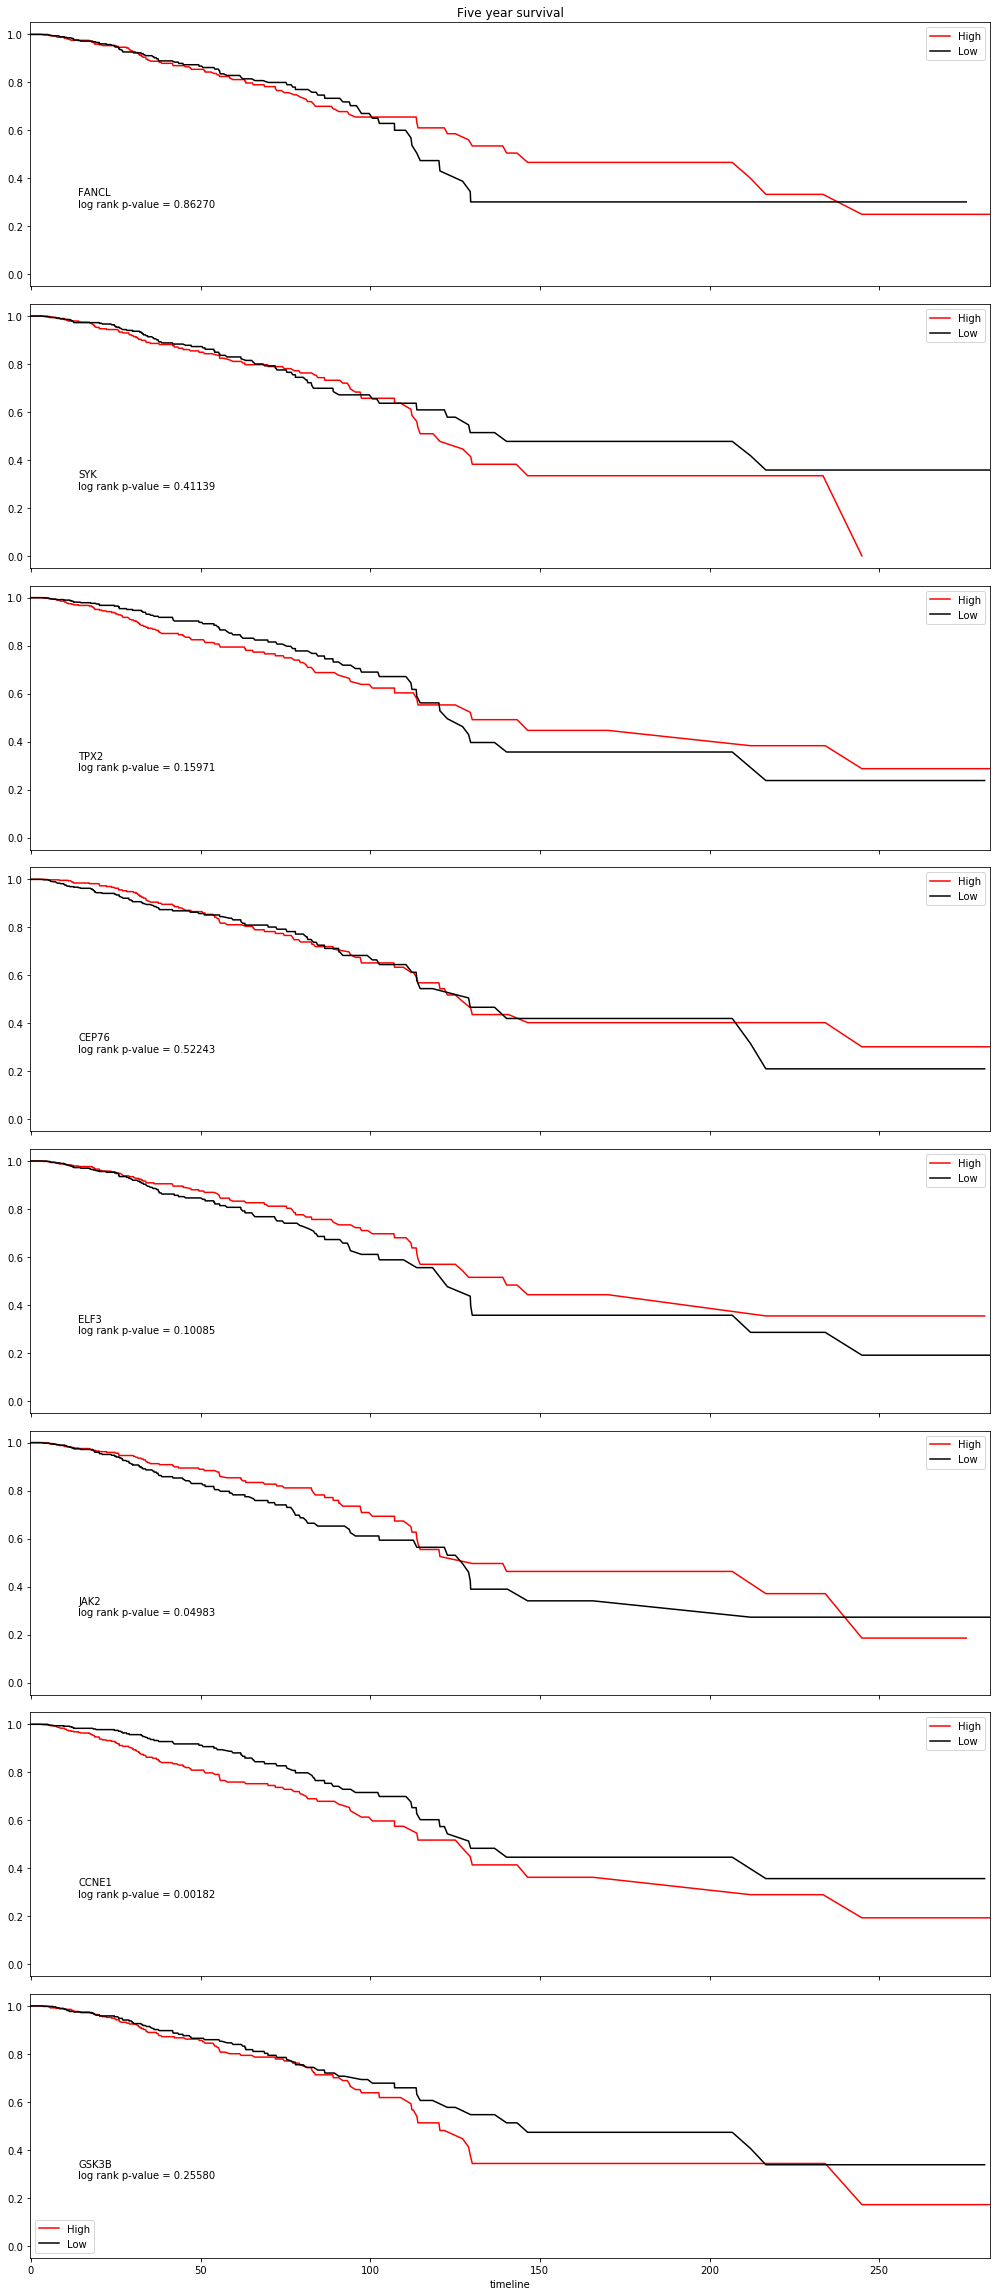

In [267]:
import matplotlib.pyplot as pl
GeneLists=['FANCL','SYK','TPX2','CEP76','ELF3','JAK2','CCNE1','GSK3B']
n_column=1
fig,ax = pl.subplots(len(GeneLists),n_column,figsize=(14,4*len(GeneLists)),sharex=True,sharey=True)

#ax[0].set_title("Overall Survival")
ax[0].set_title("Five year survival")

if len(GeneLists) == 1:
    ax = np.reshape(ax, (-1, len(ax)))

for i in range(len(GeneLists)):
    
    #MergeOverallSurvivalCurve(GeneLists[i],ax[i],GeneLists[i],df_survival,df_survival)
    MergeFiveYearSurvivalCurve(GeneLists[i],ax[i],GeneLists[i],df_survival,df_survival)
    
pl.tight_layout()

In [266]:
# five year survival code in MergeFiveYearSurvivalCurve
def MergeFiveYearSurvivalCurve(GeneID, axis,Genename, df_survival, expression):    
    T = df_survival["SurvivalDays"]
    C = df_survival["Dead"].astype(bool)

    from lifelines import KaplanMeierFitter
    kmf = KaplanMeierFitter()

    import matplotlib.pylab as pl
    dem = expression[Genename] > st.median(expression[Genename])
    #print (dem)

    #ax = pl.subplot(111)
    ConvertedTS=0
    
    for i in (df_survival.index):
        if T[i]>1825:
            T[i]=1825
            C[i]=0
            ConvertedTS=ConvertedTS+1
            #print (T[i])


    kmf.fit(T[dem], event_observed=C[dem] ,label='High')
    kmf.plot(ax=axis,show_censors=True,color='red')

    kmf.fit(T[~dem], event_observed=C[~dem] ,label='Low')
    kmf.plot(ax=axis,show_censors=True,color='black')

    from lifelines.statistics import logrank_test


    results = logrank_test(T[dem], T[~dem], C[dem], C[~dem], alpha=.95)
    #pl.title('%s\np-value = %.2e'%(Genename,results.p_value))
    pl.text(0.05,0.3,'%s\nlog rank p-value = %.5f'%(GeneID,results.p_value), transform = axis.transAxes)

    pl.legend(loc='lower left')
    #return ConvertedTS

In [11]:
def MergeOverallSurvivalCurve(GeneID, axis,Genename, df_survival, expression):    
    T = df_survival["OS_Months"]
    C = df_survival["Dead"].astype(bool)

    from lifelines import KaplanMeierFitter
    kmf = KaplanMeierFitter()

    import matplotlib.pylab as pl
    dem = expression[Genename] > st.median(expression[Genename])
    #print (dem)


    kmf.fit(T[dem], event_observed=C[dem] ,label='High')
    kmf.plot(ax=axis,show_censors=True,color='red')
    kmf.survival_function_.plot(ax=axis,color='red')

    kmf.fit(T[~dem], event_observed=C[~dem] ,label='Low')
    kmf.plot(ax=axis,show_censors=True,color='black')
    kmf.survival_function_.plot(ax=axis,color='black')

    from lifelines.statistics import logrank_test


    results = logrank_test(T[dem], T[~dem], C[dem], C[~dem], alpha=.95 )
    
    #pl.title('%s\np-value = %.2e'%(Genename,results.p_value))
    pl.text(0.05,0.3,'%s\nlog rank p-value = %.5f'%(GeneID,results.p_value), transform = axis.transAxes)

    pl.legend(loc='lower left')

In [214]:
df_tcga_CCNE1=pd.concat([df_CBP["OS_Months"],df_CBP['Dead'],df_tcga['CCNE1']],axis=1,join='inner')
df_tcga_CCNE1.head()
df_survival_allGenes = pd.concat([df_CBP,df_tcga], axis = 1, join = 'inner')
#df_survival_allGenes = pd.concat([df2_CBP,df_tcga], axis = 1, join = 'inner')
df_survival_allGenes.head()
df_survival_allGenes.shape
#(870, 20538)

(1075, 20536)

In [238]:
df_survival["Dead"].astype(bool)#.map(type).unique()

TCGA-E2-A572-01A    False
TCGA-WT-AB41-01A    False
TCGA-E2-A574-01A    False
TCGA-V7-A7HQ-01A    False
TCGA-A2-A3XU-01A     True
TCGA-LL-A5YL-01A    False
TCGA-E9-A3X8-01A    False
TCGA-OL-A66L-01A    False
TCGA-HN-A2NL-01A    False
TCGA-A2-A3XV-01A    False
TCGA-OL-A66N-01A    False
TCGA-E2-A576-01A    False
TCGA-LL-A7SZ-01A    False
TCGA-E9-A5FK-01A    False
TCGA-AC-A2QJ-01A     True
TCGA-A2-A0CR-01A    False
TCGA-AC-A3TM-01A    False
TCGA-LD-A66U-01A    False
TCGA-A7-A425-01A    False
TCGA-LL-A6FQ-01A    False
TCGA-Z7-A8R5-01A    False
TCGA-5T-A9QA-01A    False
TCGA-BH-A42U-01A    False
TCGA-AR-A1AQ-01A    False
TCGA-LL-A5YM-01A    False
TCGA-AO-A0JB-01A    False
TCGA-E9-A1RG-01A    False
TCGA-AC-A62V-01A     True
TCGA-LL-A6FP-01A    False
TCGA-OL-A5D7-01A    False
                    ...  
TCGA-BH-A0HY-01A    False
TCGA-D8-A1JJ-01A    False
TCGA-D8-A1X5-01A    False
TCGA-A8-A07B-01A    False
TCGA-E2-A1LL-01A    False
TCGA-AR-A255-01A    False
TCGA-B6-A0IK-01A     True
TCGA-A2-A0YM

In [408]:
def SurvivalCurve(Genename):    

    from lifelines import KaplanMeierFitter
    kmf = KaplanMeierFitter()

    import matplotlib.pylab as pl
    dem = df_survival[Genename] > df_survival[Genename].median()
# dem = df['GeneExpression', 'True', 'False]

    ax = pl.subplot(111)

    T = df_survival["OS_Months"]
    C = df_survival["Dead"].astype(bool)

    kmf.fit(T[dem], event_observed=C[dem] )
    kmf.survival_function_.plot(ax=ax)

    kmf.fit(T[~dem], event_observed=C[~dem] )
    kmf.survival_function_.plot(ax=ax)

    from lifelines.statistics import logrank_test


    results = logrank_test(T[dem], T[~dem], C[dem], C[~dem], alpha=.95 )
    pl.title(results.p_value)

    pl.legend(['High','Low'])

def getPValue(Genename):
    
    dem = df_survival_allGenes[Genename] > df_survival_allGenes.median(df_survival_allGenes[Genename])

    T = df_survival_allGenes["SurvivalDays"]
    C = df_survival_allGenes["Dead"].astype(bool)

    from lifelines.statistics import logrank_test
    
    if np.all(dem) | np.all(~dem):
        return np.nan
    else: 
        results = logrank_test(T[dem], T[~dem], C[dem], C[~dem], alpha=.95 )
        return (results.p_value)


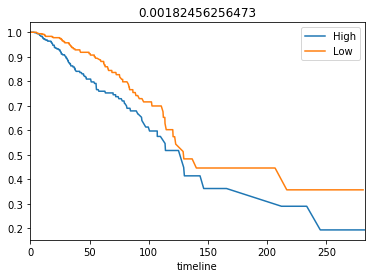

In [232]:
SurvivalCurve('CCNE1')

In [45]:
df_survival_allGenes.columns
df_survival_allGenes.head()

,SurvivalDays,Dead,gene_i,?,?,?,?,?,?,?,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
TCGA-GM-A5PX-01A,551.0,False,normalized_count,0.0000,1.1723,1.9539,158.0070,1037.1239,0.0000,176.2407,...,28.9175,416.5690,887.0653,86.3619,693.6303,3123.8765,589.2927,794.0602,146.5416,0.0000
TCGA-AC-A5XS-01A,588.0,False,normalized_count,0.0000,0.0000,11.1491,151.8926,1526.0331,0.0000,163.9847,...,25.0855,463.1522,830.6080,25.5500,730.7306,3987.1971,818.5298,680.0951,31.5891,0.0000
TCGA-A2-A0CL-01A,3015.0,False,normalized_count,0.0000,10.7672,7.7650,91.2602,738.3247,0.0000,229.4292,...,117.8651,530.7635,1328.0208,184.2105,959.2291,3324.6850,2349.8888,765.7524,73.0170,0.0000
TCGA-C8-A12N-01A,358.0,False,normalized_count,0.0000,6.2159,5.8773,88.9005,1209.3117,0.0000,237.4282,...,40.7135,339.4135,938.4259,8.0621,707.0442,3945.1779,1019.8529,836.0375,87.4735,0.4031
TCGA-BH-A1ET-01A,2520.0,True,normalized_count,0.0000,6.0858,2.7404,66.8468,1077.6600,0.0000,116.6783,...,82.8804,569.6141,1181.6372,113.8798,1601.2055,1545.6649,1745.8694,1354.5019,438.0819,0.0000


In [ ]:
#del df_tcga['gene_i']
del df_tcga['?']
for gene in df_tcga.columns:
    new=[]
    a=df_survival_allGenes[gene]
    for i in a:
        if type(i) is not float:
            #print (a.index)
            #i=float(i)
            new.append(i)
            #print (type(i))
            #print (i)
        else:
            new.append(i)
    df_survival_allGenes[gene]=new
del df_survival_allGenes['?']
df_survival_allGenes.to_csv('TCGA_1080BreastCancer_geneExpression_float.txt')
df_survival_allGenes.head()

In [ ]:
s = pd.Series(index = df_tcga.columns)
for gene in df_tcga.columns:
    s[gene] = getPValue(gene)
from statsmodels.sandbox.stats.multicomp import multipletests
qvalues = multipletests(s.dropna().sort_values(), alpha= .05, method='fdr_bh', is_sorted=True, returnsorted=False)[1]
df5 = s.dropna().sort_values().to_frame(name='P-value') 
df5['Q-value'] = qvalues
df5=pd.concat([GeneList,df5],axis=1,join="inner")
df5=df5.sort_values('Q-value')
df5.to_csv('Ranked_TCGA_1080BreastCancer.txt')
df5.head()

In [72]:
#cBioPortal survival data
FileName = '/Users/zhaoz/Dropbox/SurvivalAnalyses_Jupyter/Survival_TCGA/brca_tcga_clinical_data.tsv'
lst = ['[Not Available]']
#df1 = pd.read_csv(FileName, sep='\t',index_col='Patient ID', skiprows=[1,2,3,4,5], na_values = lst)
df1_CBP = pd.read_csv(FileName, sep='\t',index_col='Sample ID', skiprows=[1,2,3,4,5], na_filter=True)
#del df1.index.names
df_cBioportalSurvival = df1_CBP[['Overall Survival Status', 'Overall Survival (Months)', 'Disease Free Status', 'Disease Free (Months)']].copy()

#new=[]
#for i in (df2_CBP.index):
    #temp=i+'A'
    #new.append(i+'A')
#df2_CBP.index=new
                                    
df_cBioportalSurvival.head()

,Overall Survival Status,Overall Survival (Months),Disease Free Status,Disease Free (Months)
Sample ID,,,,
TCGA-5L-AAT1-01,LIVING,48.32,DiseaseFree,48.32
TCGA-5T-A9QA-01,LIVING,9.95,DiseaseFree,9.95
TCGA-A1-A0SB-01,LIVING,8.51,DiseaseFree,8.51
TCGA-A1-A0SD-01,LIVING,14.36,DiseaseFree,14.36
TCGA-A1-A0SE-01,LIVING,43.40,DiseaseFree,43.40


In [66]:
df2_CBP.shape

(1100, 4)

In [79]:
#df1_CBP
prim=list(set(df2_CBP.index)-set(mets7))
df_CBP=df2_CBP.T[prim].T
df_CBP.shape
df_CBP.to_csv('SurvivalData_cBioPortal.csv')

In [ ]:

df_tcga_NonTNBC=df_tcga_8g.T[NonTCGAPatients]
df_tcga_NonTNBC.head()

df_tcga_NonTNBC.to_csv('TCGA_nonTNBC_8genesExp.txt')
df_tcga=df_tcga_8g
df_tcga.head()
df_tcga.to_csv('TCGA_8genesExp.csv')